# Ertugrul Taha ATLIHAN - 19286

In [1]:
import pandas as pd
import numpy as np
import reverse_geocoder as rg
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import pprint
pp = pprint.PrettyPrinter(indent=4)
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
pp = pprint.PrettyPrinter(indent=4)
sns.set(style="darkgrid")

%matplotlib inline

In [2]:
from os.path import join

# Opening Data File 

In [3]:
d_path = "./data"
filename = "taxi-trips.csv"

df = pd.read_csv(join(d_path, filename))

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [5]:
df.index


RangeIndex(start=0, stop=118185, step=1)

In [6]:
# df.columns



# Summary of Columns

In [7]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


# Creating New Columns

In [9]:
pickup_coordinates = list(zip(df.pickup_latitude, df.pickup_longitude))

In [10]:
dropoff_coordinates = list(zip(df.dropoff_latitude, df.dropoff_longitude))

In [11]:
pickup_district_address = rg.search(pickup_coordinates )

Loading formatted geocoded file...


In [12]:
dropoff_district_address = rg.search(dropoff_coordinates )

In [13]:
dropoff_district = rg.search(dropoff_coordinates)
df['dropoff_district'] = dropoff_district

In [14]:
pickup_district = []

In [15]:
dropoff_district = []

In [16]:
for i in range(len(pickup_district_address)):
    pickup_district.append(pickup_district_address[i]['name'])

In [17]:
for i in range(len(dropoff_district_address)):
    dropoff_district.append(dropoff_district_address[i]['name'])

In [18]:
pickup_district_address

[OrderedDict([('lat', '40.78343'),
              ('lon', '-73.96625'),
              ('name', 'Manhattan'),
              ('admin1', 'New York'),
              ('admin2', 'New York County'),
              ('cc', 'US')]),
 OrderedDict([('lat', '40.74482'),
              ('lon', '-73.94875'),
              ('name', 'Long Island City'),
              ('admin1', 'New York'),
              ('admin2', 'Queens County'),
              ('cc', 'US')]),
 OrderedDict([('lat', '40.76955'),
              ('lon', '-74.02042'),
              ('name', 'Weehawken'),
              ('admin1', 'New Jersey'),
              ('admin2', 'Hudson County'),
              ('cc', 'US')]),
 OrderedDict([('lat', '40.78343'),
              ('lon', '-73.96625'),
              ('name', 'Manhattan'),
              ('admin1', 'New York'),
              ('admin2', 'New York County'),
              ('cc', 'US')]),
 OrderedDict([('lat', '40.71427'),
              ('lon', '-74.00597'),
              ('name', 'New York City'),

In [19]:
df['pickup_district'] = pickup_district

In [20]:
df['dropoff_district'] = dropoff_district

In [21]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_district,pickup_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Manhattan,Long Island City
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Manhattan,Weehawken
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Long Island City,Manhattan
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City


# Extracting the Top 5 Districts Without Passenger Count) 
# (Method which I found)

In [22]:
from collections import Counter

Counters ={}

for common_cities in df['pickup_district'].unique():
    Counters[common_cities] = Counter()
    indices = (common_cities == df['pickup_district'])
    for common_cities in df[indices]['pickup_district']:
        Counters[common_cities].update(pickup_district)
    

In [23]:
da = df.groupby('pickup_district')['id'].nunique()


In [24]:
da.sort_values(ascending=False)

pickup_district
Manhattan              45329
New York City          34625
Long Island City       17787
Weehawken              11334
The Bronx               2777
Inwood                  2032
Hoboken                 1238
Guttenberg               944
Edgewater                836
Jamaica                  547
Brooklyn                 469
Borough of Queens         81
Fort Lee                  57
East New York             33
Bensonhurst               22
Bayonne                   10
Eastchester                5
Elizabeth                  4
Atlantic Beach             4
Newark                     4
Jersey City                3
Secaucus                   3
Mount Vernon               3
Coney Island               3
Fairview                   2
Goldens Bridge             2
Yonkers                    2
Old Bethpage               1
Staten Island              1
Bellerose Terrace          1
Shark River Hills          1
Munsey Park                1
Rye Brook                  1
Cliffside Park             

len(pickup_district_address)

In [25]:
df['pickup_district'].unique()


array(['Manhattan', 'Long Island City', 'Weehawken', 'New York City',
       'Hoboken', 'Guttenberg', 'Jamaica', 'Edgewater', 'Brooklyn',
       'The Bronx', 'Inwood', 'Borough of Queens', 'Fort Lee',
       'Coney Island', 'East New York', 'White Plains',
       'East Atlantic Beach', 'Emerson', 'Atlantic Beach', 'Rye Brook',
       'Morris Plains', 'Cos Cob', 'Bensonhurst', 'New Rochelle',
       'Shark River Hills', 'Staten Island', 'Elizabeth', 'Bayonne',
       'Great Neck Plaza', 'Eastchester', 'Plainfield', 'Goldens Bridge',
       'Jersey City', 'Newark', 'Pemberwick', 'Hackensack', 'Secaucus',
       'Yonkers', 'Iselin', 'Mount Vernon', 'Fairview', 'Harrison',
       'North New Hyde Park', 'Hicksville', 'Munsey Park',
       'Croton-on-Hudson', 'Pelham Manor', 'Pelham', 'Ridgefield Park',
       'Old Bethpage', 'Purchase', 'Roslyn', 'Cliffside Park',
       'Old Tappan', 'Bellerose Terrace', 'Lenape Heights'], dtype=object)

In [26]:
df['dropoff_district'].unique()

array(['Manhattan', 'Long Island City', 'New York City', 'Weehawken',
       'East New York', 'Borough of Queens', 'Guttenberg', 'The Bronx',
       'Edgewater', 'Coney Island', 'Inwood', 'Brooklyn', 'Jamaica',
       'Hoboken', 'Fort Lee', 'Elizabeth', 'Baldwin', 'Bensonhurst',
       'Eastchester', 'Bellerose Terrace', 'South Nyack', 'Newark',
       'East Atlantic Beach', 'Mount Vernon', 'Staten Island',
       'Plainview', 'South Valley Stream', 'White Plains', 'Emerson',
       'Atlantic Beach', 'Morris Plains', 'Lake Success', 'Yonkers',
       'East Meadow', 'Cos Cob', 'Lawrence', 'North Haledon', 'Pelham',
       'Greenwich', 'Bogota', 'North Valley Stream', 'Elmont',
       'Pelham Manor', 'Shark River Hills', 'Searingtown', 'Lodi',
       'Montvale', 'Hempstead', 'University Gardens', 'Plainsboro Center',
       'Bayonne', 'Flower Hill', 'West Orange', 'Secaucus', 'Jersey City',
       'Barnum Island', 'Great Neck Plaza', 'Woodland Park', 'Cedarhurst',
       'Hartsdale', 'St

ass = df.set_index(["pickup_district", "passenger_count"]).count(level = "pickup_district")

df['pickup_district'].describe()

aha = (common_cities == df['pickup_district'])

aha.tolist

In [27]:
Counters ={}

for common_cities in df['pickup_district'].unique():
    indices = (common_cities == df['pickup_district'])
    count = 0
    for i in range(len(indices)):
        if indices[i] == True:
            count = count+1
    Counters[common_cities] = count

In [28]:
import operator
sortedDistricts = sorted(Counters.items(), key = operator.itemgetter(1), reverse= True)

In [29]:
sortedDistricts

[('Manhattan', 45329),
 ('New York City', 34625),
 ('Long Island City', 17787),
 ('Weehawken', 11334),
 ('The Bronx', 2777),
 ('Inwood', 2032),
 ('Hoboken', 1238),
 ('Guttenberg', 944),
 ('Edgewater', 836),
 ('Jamaica', 547),
 ('Brooklyn', 469),
 ('Borough of Queens', 81),
 ('Fort Lee', 57),
 ('East New York', 33),
 ('Bensonhurst', 22),
 ('Bayonne', 10),
 ('Eastchester', 5),
 ('Atlantic Beach', 4),
 ('Elizabeth', 4),
 ('Newark', 4),
 ('Coney Island', 3),
 ('Jersey City', 3),
 ('Secaucus', 3),
 ('Mount Vernon', 3),
 ('Goldens Bridge', 2),
 ('Yonkers', 2),
 ('Fairview', 2),
 ('White Plains', 1),
 ('East Atlantic Beach', 1),
 ('Emerson', 1),
 ('Rye Brook', 1),
 ('Morris Plains', 1),
 ('Cos Cob', 1),
 ('New Rochelle', 1),
 ('Shark River Hills', 1),
 ('Staten Island', 1),
 ('Great Neck Plaza', 1),
 ('Plainfield', 1),
 ('Pemberwick', 1),
 ('Hackensack', 1),
 ('Iselin', 1),
 ('Harrison', 1),
 ('North New Hyde Park', 1),
 ('Hicksville', 1),
 ('Munsey Park', 1),
 ('Croton-on-Hudson', 1),
 ('Pel

In [30]:
print("Most Frequent Pickup Districts;")
print("1 " + sortedDistricts[0][0])
print("2 " + sortedDistricts[1][0])
print("3 " + sortedDistricts[2][0])
print("4 " + sortedDistricts[3][0])
print("5 " + sortedDistricts[4][0])

Most Frequent Pickup Districts;
1 Manhattan
2 New York City
3 Long Island City
4 Weehawken
5 The Bronx


In [31]:
Counters ={}

for common_cities in df['dropoff_district'].unique():
    indices = (common_cities == df['dropoff_district'])
    count = 0
    for i in range(len(indices)):
        if indices[i] == True:
            count = count+1
    Counters[common_cities] = count
    

In [32]:
import operator
sortedDistricts = sorted(Counters.items(), key = operator.itemgetter(1), reverse= True)


In [33]:
print("Most Frequent Dropoff Districts;")
print("1 " + sortedDistricts[0][0])
print("2 " + sortedDistricts[1][0])
print("3 " + sortedDistricts[2][0])
print("4 " + sortedDistricts[3][0])
print("5 " + sortedDistricts[4][0])

Most Frequent Dropoff Districts;
1 Manhattan
2 New York City
3 Long Island City
4 Weehawken
5 Brooklyn


# Top 5 Districts with Passenger Count (Recitation Method)

In [34]:
top5pickupD = df.groupby(by="pickup_district").sum()["passenger_count"].sort_values(ascending=False)[:5]
print(top5pickupD)


pickup_district
Manhattan           75120
New York City       57657
Long Island City    29095
Weehawken           18646
The Bronx            4796
Name: passenger_count, dtype: int64


In [35]:
top5dropoffD = df.groupby(by="dropoff_district").sum()["passenger_count"].sort_values(ascending=False)[:5]
print(top5dropoffD)

dropoff_district
Manhattan           73302
New York City       51666
Long Island City    32965
Weehawken           17736
Brooklyn             3403
Name: passenger_count, dtype: int64


# Creating Distance Column

In [36]:
from geopy.distance import geodesic
distances = []
for i in range(len(dropoff_coordinates)):
       
    distances.append(geodesic(pickup_coordinates[i], dropoff_coordinates[i]).miles)



In [37]:
df["distances"] = distances
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_district,pickup_district,distances
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Manhattan,Long Island City,3.178194
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Manhattan,Weehawken,0.928961
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Long Island City,Manhattan,1.228003
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103


# Time of Day Aggregating

In [38]:
df['time_of_day'] = df['pickup_datetime'].astype(str).str[11:]

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_district,pickup_district,distances,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,17:24:55
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Manhattan,Long Island City,3.178194,21:45:01
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Manhattan,Weehawken,0.928961,07:11:23
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Long Island City,Manhattan,1.228003,14:05:39
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,15:04:38


In [39]:
df["time_of_day"] = np.where(np.logical_and(df["time_of_day"] > "07:00:00", df["time_of_day"] <= "09:00:00"), "rush_hour_morning", np.where(np.logical_and(df["time_of_day"] > "09:00:00", df["time_of_day"] <= "16:00:00"), "afternoon", np.where(np.logical_and(df["time_of_day"] > "16:00:00", df["time_of_day"] <= "18:00:00"), "rush_hour_evening", np.where(np.logical_and(df["time_of_day"] > "18:00:00", df["time_of_day"] <= "23:00:00"), "evening", "late_night"))))

In [40]:
df1 = df
df1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_district,pickup_district,distances,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Manhattan,Long Island City,3.178194,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Manhattan,Weehawken,0.928961,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Long Island City,Manhattan,1.228003,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon


df1.groupby(['time_of_day']).mean().groupby(['trip_duration']).mean()

df1.groupby(['trip_duration', 'time_of_day']).sum().reset_index().groupby('time_of_day').mean()

# Distances in Different Times of Day

In [41]:
import matplotlib.pyplot as plt

time_of_day
afternoon            1.932431
evening              2.099108
late_night           2.558593
rush_hour_evening    2.077251
rush_hour_morning    1.943823
Name: distances, dtype: float64


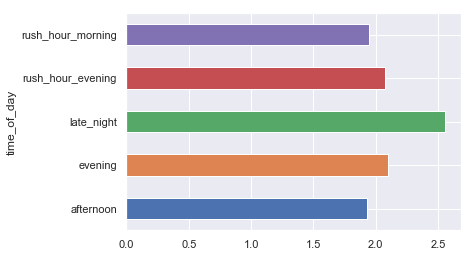

In [42]:
distances_varies = df1.groupby("time_of_day").mean()["distances"]
print(distances_varies)
distances_varies.plot(kind="barh")


# Trip Durations in Different Times of Day

time_of_day
afternoon             963.905194
evening               893.613035
late_night            866.062671
rush_hour_evening    1024.570625
rush_hour_morning     918.488716
Name: trip_duration, dtype: float64


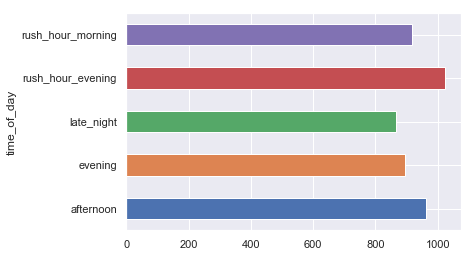

In [43]:
duration_varies = df1.groupby("time_of_day").mean()["trip_duration"]
print(duration_varies)
duration_varies.plot(kind="barh")

  
# Hypothesis Testing 1

# Does passenger group size affect the distance?

Null hypothesis: passenger group size has no effect on the distance.

In [44]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_district,pickup_district,distances,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Manhattan,Long Island City,3.178194,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Manhattan,Weehawken,0.928961,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Long Island City,Manhattan,1.228003,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon


In [45]:
count1_df = df.loc[df['passenger_count'] == 1]
count2_df = df.loc[df['passenger_count'] >  1]

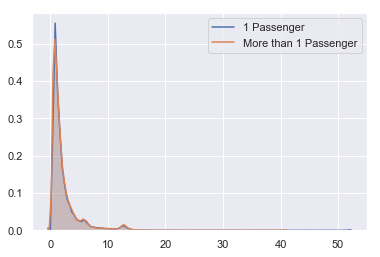

In [54]:
ax = sns.kdeplot(count1_df["distances"].rename("1 Passenger"), shade=True)
sns.kdeplot(count2_df["distances"].rename("More than 1 Passenger"), ax=ax, shade=True)

In [52]:
stats.ttest_ind(count1_df['distances'],count2_df['distances'], equal_var=False)

Ttest_indResult(statistic=-4.903362110492197, pvalue=9.445117080447406e-07)

If we set the significance level as 0.05, we can reject the null hypothesis since P-Value is almost 0.

# Hypothesis Testing 2
# Does days of week affect the distance?

Null hypothesis: The day of the week has no effect on the distance.

In [48]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
liste = df["pickup_datetime"].dt.weekday
df_c = df.copy()
df_c["day_index"] = [liste[i] for i in range(len(dropoff_coordinates))] # adding day's indexes in a temporary table.

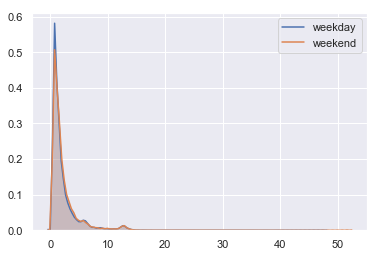

In [55]:
firstWeek_df = df_c[(df_c["day_index"] < 5) & (df_c["day_index"] >= 0)]
secondWeek_df = df_c[df_c["day_index"] >=5]

ax = sns.kdeplot(firstWeek_df["distances"].rename("weekday"), shade=True)
sns.kdeplot(secondWeek_df["distances"].rename("weekend"), ax=ax, shade=True)

plt.show()

In [56]:
firstWeek_values = firstWeek_df["distances"].values
secondWeek_values = secondWeek_df["distances"].values



_, p_value = stats.ttest_ind(a=firstWeek_values, b=secondWeek_values, equal_var=False)
p_value

2.0924144330692153e-08

If we set the significance level as 0.05, we can reject the null hypothesis since P-Value is almost 0.